# Module 1 - Peer reviewed

### Outline:
In this homework assignment, there are four objectives. 

1. To assess your knowledge of ANOVA/ANCOVA models
2. To apply your understanding of these models to a real-world datasets

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what you are attempting to explain or answer.

In [1]:
# Load Required Packages
library(tidyverse)
library(ggplot2)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Problem #1: Simulate ANCOVA Interactions

In this problem, we will work up to analyzing the following model to show how interaction terms work in an ANCOVA model.

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3XZ + \varepsilon_i$$

This question is designed to enrich understanding of interactions in ANCOVA models. There is no additional coding required for this question, however we recommend messing around with the coefficents and plot as you see fit. Ultimately, this problem is graded based on written responses to questions asked in part **(a)** and **(b)**.

To demonstrate how interaction terms work in an ANCOVA model, let's generate some data. First, we consider the model 

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \varepsilon_i$$

where $X$ is a continuous covariate, $Z$ is a dummy variable coding the levels of a two level factor, and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. We choose values for the parameters below (b0,...,b2). 

,x,z,y
,<dbl>,<fct>,<dbl>
1,0.09159879,1,6.290179
2,1.96439135,1,10.168612
3,0.57805656,1,7.200027
4,0.03370108,0,1.289331
5,1.82614045,0,4.470862
6,0.71220319,0,2.485743


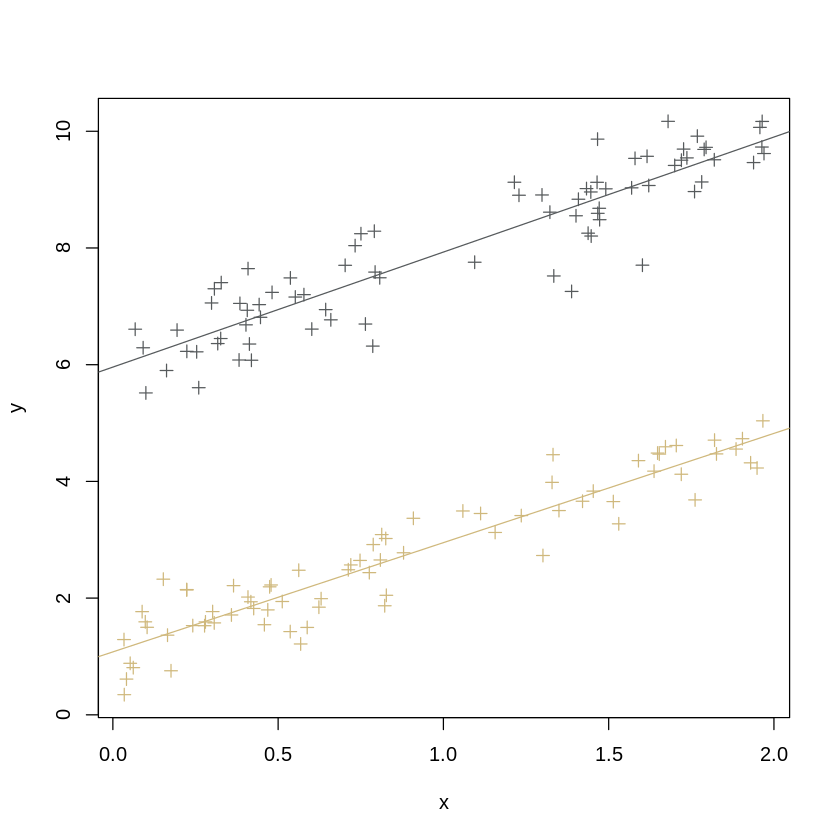

In [1]:
rm(list = ls())
set.seed(99)

#simulate data
n = 150
# choose these betas
b0 = 1; b1 = 2; b2 = 5; eps = rnorm(n, 0, 0.5);
x = runif(n,0,2); z = runif(n,-2,2);
z = ifelse(z > 0,1,0); 
# create the model:
y = b0 + b1*x + b2*z + eps
df = data.frame(x = x,z = as.factor(z),y = y)
head(df)

#plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("#CFB87C","#565A5C")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "#CFB87C")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "#565A5C")

#### 1. (a) What happens with the slope and intercept of each of these lines?

In this case, we can think about having two separate regression lines--one for $Y$ against $X$ when the unit is in group $Z = 0$ and another for $Y$ against $X$ when the unit is in group $Z = 1$. What do we notice about the slope of each of these lines?

#### 1. (b)  Now, let's add the interaction term (let $\beta_3 = 3$). What happens to the slopes of each line now?

The model now is of the form:

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3XZ + \varepsilon_i$$

where $X$ is a continuous covariate, $Z$ is a dummy variable coding the levels of a two level factor, and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. We choose values for the parameters below (b0,...,b3). 

,x,z,y
,<dbl>,<fct>,<dbl>
1,0.09159879,1,6.564975
2,1.96439135,1,16.061786
3,0.57805656,1,8.934197
4,0.03370108,0,1.289331
5,1.82614045,0,4.470862
6,0.71220319,0,2.485743


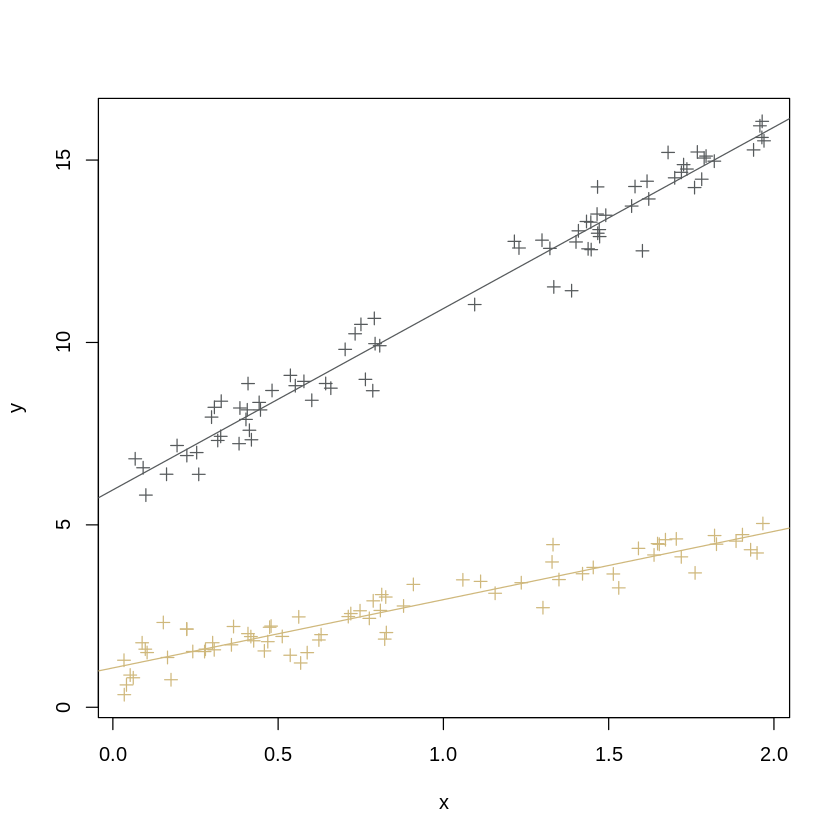

In [2]:
#simulate data
set.seed(99)
n = 150
# pick the betas
b0 = 1; b1 = 2; b2 = 5; b3 = 3; eps = rnorm(n, 0, 0.5); 

#create the model
y = b0 + b1*x + b2*z + b3*(x*z) + eps
df = data.frame(x = x,z = as.factor(z),y = y)
head(df)

lmod = lm(y ~ x + z, data = df)
lmodz0 = lm(y[z == 0] ~ x[z == 0], data = df)
lmodz1 = lm(y[z == 1] ~ x[z == 1], data = df)
# summary(lmod)
# summary(lmodz0)
# summary(lmodz1)

# lmodInt = lm(y ~ x + z + x*z, data = df)
# summary(lmodInt)

#plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("#CFB87C","#565A5C")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "#CFB87C")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "#565A5C")

In this case, we can think about having two separate regression lines--one for $Y$ against $X$ when the unit is in group $Z = 0$ and another for $Y$ against $X$ when the unit is in group $Z = 1$. **What do you notice about the slope of each of these lines?**


---


## Problem #2

In this question, we ask you to analyze the ```mtcars``` dataset. The goal if this question will be to try to explain the variability in miles per gallon (mpg) using transmission type (am), while adjusting for horsepower (hp).

To load the data, use ```data(mtcars)```

#### 2. (a) Rename the levels of am from 0 and 1 to "Automatic" and "Manual" (one option for this is to use the revalue() function in the plyr package). Then, create a boxplot (or violin plot) of mpg against am. What do you notice? Comment on the plot

In [3]:
data(mtcars)

# your code here

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact




#### 2. (b) Calculate the mean difference in mpg for the Automatic group compared to the Manual group. 

In [4]:
# your code here

#### 2. (c) Construct three models: 

1. An ANOVA model that checks for differences in mean mpg across different transmission types. 
2. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower.
3. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower and for interaction effects between horsepower and transmission type.

**Using these three models, determine whether or not the interaction term between transmission type and horsepower is significant.**

In [5]:
# your code here

#### 2. (d) Construct a plot of mpg against horsepower, and color points based in transmission type. Then, overlay the regression lines with the interaction term, and the lines without. How are these lines consistent with your answer in (b) and (c)?

In [6]:
# your code here